In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

class InPlaceModifiedMNIST(datasets.MNIST):
    def __getitem__(self, index):
        image, label = super().__getitem__(index)
        height, width = image.shape[-2:]

        # Convert the image to a tensor
        image_tensor = image.clone()

        # Modify the image tensor in-place
        x = torch.randint(0, height - 5, size=(1,))
        y = torch.randint(0, width - 5, size=(1,))
        image_tensor[:, x:x+5, y:y+5] = torch.zeros((5,5))

        # Convert the modified tensor back to a numpy array
        modified_image = image_tensor

        return modified_image, image

# Define the transformation
transform = transforms.Compose(
    [
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

# Create the modified dataset
modified_dataset = InPlaceModifiedMNIST(
    root="../data", train=True, transform=transform, download=True
)


In [ ]:
for i in range(2):
    blur, orig  = modified_dataset[i]
    plt.imshow(torch.squeeze(blur), cmap='gray')
    # plt.imshow(torch.squeeze(orig), cmap='gray')
    plt.show()

# Choose Blur Region by picking block within digit

In [ ]:
import torch
import torchvision 
import matplotlib.pyplot as plt

mnist_data = torchvision.datasets.MNIST(
    root="../data", train=True, transform=transforms.ToTensor(), download=True
)


# torch.manual_seed(2023)

image = next(iter(mnist_data))[0]

loc  = torch.nonzero(torch.squeeze(image > 0 ) )
rand = torch.randint(low = 0, high= len(loc), size=(1,))
xloc, yloc = torch.squeeze(loc[rand, :])[0] , torch.squeeze(loc[rand, :])[1]

sub_matrix_size = 5


# Create the indices for the sub-matrix elements
indices_x = torch.arange(sub_matrix_size).unsqueeze(1) + xloc
indices_y = torch.arange(sub_matrix_size).unsqueeze(0) + yloc

# Apply periodic boundary conditions
indices_x %= image.shape[1]
indices_y %= image.shape[2]

# Modify the sub-matrix with 0.3 values
mean = 0.
std = 0.3
image[:, indices_x, indices_y] += torch.randn((sub_matrix_size,sub_matrix_size)) * std + mean

# normalize the image 
image  =  (image - torch.min(image) )/ (torch.max(image) - torch.min(image)) 


plt.imshow(torch.squeeze(image) ) 




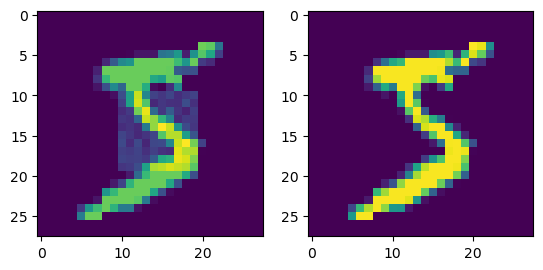

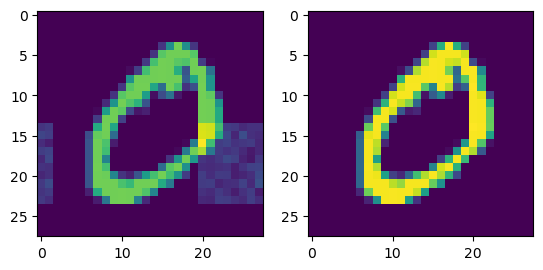

In [24]:
# Use Class method 


import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

class InPlaceModifiedMNIST(datasets.MNIST):
    def __getitem__(self, index):
        image, label = super().__getitem__(index)
        height, width = image.shape[-2:]

        # Convert the image to a tensor for blur 
        blur= image.clone()

        loc  = torch.nonzero(torch.squeeze(blur > 0 ) )
        rand = torch.randint(low = 0, high= len(loc), size=(1,)) # draw random location of non-zero index
        xloc, yloc = torch.squeeze(loc[rand, :])[0] , torch.squeeze(loc[rand, :])[1]


        # Set size of blur region to 5 
        sub_matrix_size = 10

        # Create the indices for the sub-matrix elements
        indices_x = torch.arange(sub_matrix_size).unsqueeze(1) + xloc
        indices_y = torch.arange(sub_matrix_size).unsqueeze(0) + yloc

        # Apply periodic boundary conditions
        indices_x %= image.shape[1]
        indices_y %= image.shape[2]

        # Modify the sub-matrix with 0.3 values
        mean = 0.2
        std = 0.05
        blur[:, indices_x, indices_y] += torch.randn((sub_matrix_size,sub_matrix_size)) * std + mean

        # normalize the image 
        # blur  =  (blur- torch.min(blur) )/ (torch.max(blur) - torch.min(blur)) 

        # Convert the modified tensor back to a numpy array
        modified_image = blur 

        return blur, image

# Define the transformation
transform = transforms.Compose(
    [
        transforms.RandomRotation(10),
        transforms.ToTensor(), 
    ]
)

# Create the modified dataset
modified_dataset = InPlaceModifiedMNIST(
    root="../data", train=True, transform=transform, download=True
)


for i in range(2):
    blur, orig  = modified_dataset[i]
    plt.subplot(1, 2, 1)
    plt.imshow(torch.squeeze(blur), )
    plt.subplot(1, 2, 2)
    plt.imshow(torch.squeeze(orig),)
    plt.show()

